# Klasyfikator SVM - Support Vector Machines

*W sklearn: SVC.* 
*Po polsku: maszyna wektorów nośnych.*

<img src="Grafika/svm_intro1.jpg" style="width: 200px;">
<img src="Grafika/svm_intro2.jpg" style="width: 300px;">
Źródło: https://www.safaribooksonline.com/library/view/python-deeper-insights/9781787128576/ch03s04.html

### Matematyka

Zajmujemy się klasyfikacją binarną, ale przyjmujemy konwencję $Y\in \{-1,1\}$. 

Rozważmy przypadek, gdy dane są liniowo separowalne.

$ \mathbf{w} \cdot \mathbf{x} = 0$ - równanie opisujące linię (hiperpłaszczyznę) rozdzielającą;

$
\begin{equation}
  \left.\begin{aligned}
  \mathbf{w} \cdot \mathbf{x} - b & = 1\\
  \mathbf{w} \cdot \mathbf{x} - b & = -1
\end{aligned}\right\} \text{- równania marginesów.}
\end{equation}
$

Zatem SVM szuka takiej płaszczyzny (parametrów $\mathbf{w}, b$), dla której:

$
\begin{equation}
  \begin{aligned}
  \mathbf{w} \cdot x_i - b & \geq 1, \ \ \text{ gdy } \ y_i = 1, \\
  \mathbf{w} \cdot x_i - b & \leq -1 \ \ \text{ gdy } \ y_i = -1,
\end{aligned}
\end{equation}
$

Co można zapisać w skrócie warunkiem:

$y_i ( \mathbf{w} \cdot x_i - b) \geq 1.$

A ponieważ odległość między marginesami wynosi $\frac{2}{\|\mathbf{w}\|}$, to ostatecznie uczenie klasyfikatora SVM można zdefiniować jako:

$$
\begin{equation}
  \begin{aligned}
  \text{zminimalizuj } & \ \ \ \|\mathbf{w}\|, \\ 
  \text{przy ograniczeniu: } & \ \ \ y_i ( \mathbf{w} \cdot x_i - b) \geq 1, \ \ \ i = 1, \ldots, n.
\end{aligned}
\end{equation}
$$

## Dane nieseparowalne 


<img src="Grafika/svm_nonlinear0.png" style="width: 500px;">
Źródło: http://inspirehep.net/record/1265323/plots

Definiujemy zawiasową funkcję straty (*hinge loss*):

$\zeta _{i} = \max{(0, 1 - y_i ( \mathbf{w} \cdot x_i - b))}.$

Funkcja ta przyjmuje wartość $0$, gdy obserawcja $x_i$ leży po właściwej stronie hiperpłaszczyzny rozdzielającej, oraz jej wartość jest proporcjonalna do odległości do płaszczyzny w przypadku, gdy punkt leży po złej stronie.

Uczenie klasyfikatora definiujemy jako minimalizacja funkcji:

$$\bigg[\frac {1}{n}\sum\limits_{i=1}^{n}\max (0,1-y_{i}({\mathbf {w}}\cdot {\mathbf {x}}_{i}-b) )\bigg] + \lambda \| {\mathbf {w}}\| ^{2}.$$

Czyli jednocześnie maksymalizujemy odległość między marginesami (minimalizujemy $\| {\mathbf {w}}\|$) oraz minimalizujemy karę za punkty leżące po złej stronie. $\lambda$ - współczynnik ważący składowe opytmalizowanej funkcji.

Uwaga: tak samo jak w regresji logistycznej w sklearn pojawia się parametr `C` - odpowiada on wartości $\frac{1}{\lambda}$. Zatem: im większe `C`, tym mniejszą wagę przywiązujemy do szerokości marginesu, a większą do położenia punktów po właściwych stronach, czyli margines będzie węższy ale lepiej dopasowany.

<br>
**Uwaga 1**: Czy SVM da nam prawdopodobieństwo przynależenia obserwacji do klas (jak $\pi(x)$ w regresji logistycznej, czy empiryczny procent klas w liściu w drzewie decyzyjnym?

<br>

Z definicji nie. Ale w praktyce się to robi. Przyjmuje się, że $P(Y=1 \mid x) = \text{sigmoid}(x) = \frac{1}{1+e^{-d(x)}}$, gdzie $d(x)$ - odległość punktu $x$ od hiperpłaszczyzny rozdzielającej. W `sklearn` musimy ustawić w konstruktorze SVC parametr `probability=True`, jeśli chcemy żeby klasyfikator wyliczył te prawdopodobieństwa.

<br>
**Uwaga 2**: Czy SVM można zastosować do klasyfikacji wieloklasowej?

<br>

Tak jak w regresji logistycznej, klasyfikator jest zdefiniowany dla problemu klasyfikacji binarnej, ale w praktyce oczywiście jest na to sposób i to się robi. Wykorzystuje się schemat *one-vs-rest*: w przypadku $K$ klas uczymy model $K$ razy do problemów binarnych - $Y = k$ vs $Y \neq k$. Ostateczna predykcja, to klasa $c$, dla której prawdopodobieństwo $Y = c$ było największe.

<br>

**Uwaga 3**: Czy SVM wymaga jakiegoś przygotowania danych?

Tak - skalowanie.


## Co SVM ma wspólnego z regresją logistyczną?

### Reguła decyzyjna w SVM:

$
\begin{equation}
  \begin{aligned}
  \hat{y_i} =  & \ \ \ \ 1, \ \ \text{ gdy }\mathbf{w} \cdot x_i  \geq 0, \\
  \hat{y_i} = & - 1, \ \ \text{ gdy }\mathbf{w} \cdot x_i  < 0.
\end{aligned}
\end{equation}
$


### Reguła decyzyjna w regresji logistycznej

$
\begin{equation}
  \begin{aligned}
  \hat{y_i} =  & \ \ \ \ 1, \ \ \text{ gdy }\frac{1}{1+e^{-\beta x_i}} \geq 0.5, \\
  \hat{y_i} = & - 1, \ \ \text{ gdy } \frac{1}{1+e^{-\beta x_i}} < 0.5,
\end{aligned}
\end{equation}
$

Jest ona równoważna regule:

$
\begin{equation}
  \begin{aligned}
  \hat{y_i} =  & \ \ \ \ 1, \ \ \text{ gdy } \beta x_i \geq 0, \\
  \hat{y_i} = & - 1, \ \ \text{ gdy } \beta x_i < 0.
\end{aligned}
\end{equation}
$

Czyli oba klasyfikatory mają identyczną postać reguły decyzyjnej: __liniową__.

Klasyfikatory o takiej postaci reguły decyzyjnej nazywają się klasyfikatorami liniowymi. Różnią się one sposobem wyznaczania hiperpłaszczyzny (np. prostej w przypadku 2D) rozdzielającej.

Uwaga: pomimo tego, że są to klasyfikatory liniowe, to można objąć nimi nieliniowość (transformacje zmiennych, czy kernel trick w svm).

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

X, y = digits.data, digits.target

In [2]:
X.shape

(1797, 64)

In [3]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2)

In [5]:
from sklearn.metrics import accuracy_score

In [7]:
from sklearn.svm import LinearSVC
?LinearSVC

In [26]:
X_train

array([[ 0.,  0.,  0., ...,  2.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  5.,  0.],
       [ 0.,  4., 14., ...,  1.,  0.,  0.],
       ...,
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  3.,  0.,  0.],
       [ 0.,  0.,  6., ..., 12.,  1.,  0.]])

In [8]:
model = LinearSVC()
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

/home/nor/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9666666666666667

In [11]:
X.max(0)

array([ 0.,  8., 16., 16., 16., 16., 16., 15.,  2., 16., 16., 16., 16.,
       16., 16., 12.,  2., 16., 16., 16., 16., 16., 16.,  8.,  1., 15.,
       16., 16., 16., 16., 15.,  1.,  0., 14., 16., 16., 16., 16., 14.,
        0.,  4., 16., 16., 16., 16., 16., 16.,  6.,  8., 16., 16., 16.,
       16., 16., 16., 13.,  1.,  9., 16., 16., 16., 16., 16., 16.])

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [18]:
pipeline = Pipeline([("scaler", StandardScaler()), 
                     ("model", LinearSVC())])
pipeline.fit(X_train, y_train)
accuracy_score(y_test, pipeline.predict(X_test))

/home/nor/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9611111111111111

In [22]:
scaler = StandardScaler()
scaler.fit_transform(X_train).max(0).round()

array([ 0.,  8.,  2.,  1.,  1.,  2.,  4., 13., 19.,  4.,  1.,  1.,  1.,
        1.,  4., 13., 22.,  4.,  1.,  2.,  1.,  1.,  4., 18., 38.,  4.,
        1.,  1.,  1.,  1.,  3., 22.,  0.,  3.,  1.,  1.,  1.,  1.,  3.,
        0., 26.,  5.,  1.,  1.,  1.,  1.,  3., 19., 34.,  9.,  2.,  1.,
        1.,  1.,  2., 13., 38.,  9.,  2.,  1.,  1.,  2.,  3.,  8.])

In [23]:
from sklearn.preprocessing import MaxAbsScaler

In [24]:
pipeline = Pipeline([("scaler", MaxAbsScaler()), 
                     ("model", LinearSVC())])
pipeline.fit(X_train, y_train)
accuracy_score(y_test, pipeline.predict(X_test))

0.9666666666666667

## Kernel trick

#### Jak można wykorzystać SVM do klasyfikacji w przypadku danych nieliniowych.

<img src="Grafika/svm_nonlinear1.png" style="width: 400px;">

Rozważmy rysunek B. W przedstawionych danych mamy dwie zmienne: $x_1, x_2$. Czy da się zastosować tutaj klasyfikator SVM?

<br>

<br>

Rozszerzmy ręcznie zbiór danych do następujących zmiennych:

$$x_1, x_2, x_1^2, x_2^2.$$

Gdybyśmy do takich zmiennych zastosowali SVM na tym zbiorze, to jak mogłaby wyglądać płaszczyzna rozdzielająca? Na przykład tak:

$$ 0 \cdot x_1 + 0 \cdot x_2 + a \cdot x_1^2 + b \cdot x_2^2 + c= 0.$$

Czyli $\mathbf{w} = [0, 0 , a, b]$.

Wszystko fajnie, ale skąd mamy wiedzieć jakie przekształcenia zmiennych dodać (np. na rysunku poniżej - pomijając już nawet fakt, że w rzeczywistych danych nawet nie będziemy w stanie spojrzeć na jakikolwiek rysunek...)? Możemy dodać dla każdej zmiennej dużo różnych transformacji, ale jeśli zmiennych pierwotnie będzie dużo, to z transfromacjami będzie ich $\text{dużo}^2$...

<img src="Grafika/svm_nonlinear2.png" style="width: 300px;">


Wróćmy do uczenia klasyfikatora, czyli rozwiązywania problemu optymalizacyjnego. 

Przyjmując oznaczenie $\zeta _{i}=\max (0,1-y_{i}(\mathbf{w}\cdot x_{i}-b))$, można go alternatywnie zapisać w postaci:

$$
\begin{equation}
  \begin{aligned}
  \text{zminimalizuj } & \ \ \ \frac {1}{n}\sum\limits_{i=1}^{n} \zeta_i + \lambda \|\mathbf{w}\|^2, \\ 
  \text{przy ograniczeniu: } & \ \ \ y_i ( \mathbf{w} \cdot x_i - b) \geq 1 - \zeta_i \ \text{oraz} \ \zeta_i \geq 0, \ \ \ i = 1, \ldots, n.
\end{aligned}
\end{equation}
$$


Okazuje się (matematyka wyższa...), że problem ten można sformułować równoważnie jako problem maksymalizacji funkcji:


$$f(c_1 \ldots c_n) = \sum\limits_{i=1}^n c_i - \frac{1}{2}\sum\limits_{i=1}^n \sum\limits_{j=1}^n y_i c_i (x_i\cdot x_j) y_j c_j,
$$

przy pewnych ograniczeniach, dla pewnych $c_1, \ldots, c_n$ (i tak się to w rzeczywistości odbywa). Widzimy zatem, że rozwiązanie zależy od iloczynów skalarnych obserwacji $x_i\cdot x_j$.

Rozważmy transformacje zmiennych i iloczyny sklarne. Przyjmijmy, że mamy dwie zmienne oryginalne: $x_1, x_2$. Załóżmy, że transformujemy dane do $x_1^2, x_1x_2, x_2x_1, x_2^2$. Czyli mamy przekształcenie $f(x_1,x_2) = (x_1^2, x_1x_2, x_2x_1, x_2^2)$. Weźmy przykładowo dwie obserwacje $a = (a_1, a_2), b = (b_1, b_2)$. Obserwacje te w nowej przestrzeni mają postać $f(a) = (a_1^2, a_1 a_2, a_2 a_1, a_2^2), \ f(b) = (b_1^2,b_1 b_2, b_2 b_1, b_2^2)$. Przeanalizujmy iloczyn skalarny:

$f(a) \cdot f(b) = a_1^2 \cdot b_1^2 + a_1a_2 \cdot b_1b_2 + a_2a_1 \cdot b_2b_1 + a_2^2 \cdot b_2^2 = (a_1b_1)^2 + 2a_1a_2b_1b_2 + (a_2b_2)^2$.

Teraz rozważmy funkcję $K(z) = z^2$ i spójrzmy na wynik działania tej funkcji na iloczynie $a \cdot b$:

$K(a \cdot b) = K(a_1 \cdot b_1 + a_2 \cdot b_2) = (a_1 \cdot b_1 + a_2 \cdot b_2)^2 = (a_1b_1)^2 + 2a_1a_2b_1b_2 + (a_2b_2)^2$.

Wniosek?

<br>

$f(a) \cdot f(b) = K(a \cdot b)$

<br>

Zatem, zamiast transformować zmienne, wystarczy użyć pewnego przekształcenia $K(x_i \cdot x_j)$ zamiast surowych iloczynów $x_i \cdot x_j$.

Dzięki temu:
- koszt obliczeniowy jest dużo mniejszy.
- pozbywamy się problemu szukania transformacji - w miejsce tego testujemy kilka przekształceń $K$.

$K$ jest zwane **jądrem** (funkcją jądrową, ang. *kernel*).


Jądra w sklearn:

http://scikit-learn.org/stable/modules/svm.html#svm-kernels

In [29]:
from sklearn.svm import SVC
?SVC

In [28]:
pipeline = Pipeline([("scaler", MaxAbsScaler()), 
                     ("model", SVC())])
pipeline.fit(X_train, y_train)
accuracy_score(y_test, pipeline.predict(X_test))

0.9833333333333333

# Lasy losowe

Wyobraźmy sobie, że mamy 100 klasyfikatorów i każdy z nich potrafi przewidywać $Y$ ze skutecznością $70\%$. Pytanie: jaką skuteczność będzie miała procedura klasyfikacyjna polegająca na dokonaniu predykcji każdym klasyfikatorem, a następnie podjęcie ostatecznej decyzji demokratycznie - czyli finalna decyzja to klasa dominująca wśród predykcji tych stu klasyfikatorów?

<br>

<br>

<br>

<br>


Jeżeli każdy klasyfikator ma skuteczność $70\%$, to średnio 70 ze 100 klasyfikatorów podejmie prawidłową decyzję. Jakie jest prawdopodobieństwo, że więcej niż 50 się pomyli? 

Bardzo małe... Zatem mamy doskonałą metodę klasyfikacji: nauczmy dużo modeli i klasyfikujmy demokratycznie.

Zatem po co ogóle uczyć się uczenia maszynowego, skoro możemy załatwić wszystko w ten prosty sposób?

<br>

<br>


Po to, bo jest jeden haczyk: **niezależność**...

Tak pięknie byłoby, gdyby te wszystkie klasyfikatory były niezależne. A nie są... Rozważmy sytuację, w które nauczyliśmy dwa modele: regresję logistyczną i SVM. Na czym polega zależność między tymi klasyfikatorami?

1. Oba klasyfikatory uczone są na tych samych zmiennych - zatem wykryją podobne zależności w danych, co przekłada się na podobieństwo predykcji.

2. Oba klasyfikatory są nauczone na tych samych obserwacjach.

Ponadto w tym konkretnym przypadku oba klasyfikatory są to klasyfikatory liniowe, zatem podejmują decyzję na podstawie płaszczyzny rozdzielającej. Te płaszczyzny mogą być bardzo podobne... A nawet jeśli nie są bardzo podobne, to i tak predykcje obu klasyfikatorów w praktyce będą silnie skorelowane, tzn. oba klasyfikatory będą dawały bardzo podobne predykcje...

Co możemy na to poradzić?

- każdy klasyfikator uczyć na innych zmiennych -> w praktyce losowe podzbiory, 
- każdy klasyfikator uczyć na innym podzbiorze obserwacji (w praktyce ma to mniejsze znaczenie).

W obu przypadkach pojedyncze klasyfikatory będą słabsze (bo wykorzystują mniej informacji), ale globalnie to pomoże!

Czy dwa powyższe zabiegi zapewniają niezależność klasyfikacji między poszczególnymi klasyfikatorami?

Nie, bo:
- nawet jak różne klasyfikatory uczymy na różnych zmiennych, to te zmienne będą z reguły zależne. Do tego w praktyce i tak nie jesteśmy w stanie nauczyć poszczególnych modeli na rozłącznych zbiorach zmiennych, bo musielibyśmy mieć tych zmiennych bardzo dużo (no chyba, że w każdym modelu wykorzystamy bardzo mało zmiennych, ale wtedy te modele będą słabe),
- nawet jak uczymy na różnych obserwacjach, to i tak w tych obserwacjach będą ukryte te same wzorce, które będą wykrywały modele.


### Bagging - komitet algorytmów uczonych na różnych podzbiorach obserwacji i zmiennych.

In [31]:
from sklearn.ensemble import BaggingClassifier
?BaggingClassifier

### Las losowy

Las losowy - komitet drzew, w których podczas budowy drzew do wyboru najlepszego podziału w każym kroku rozpatruje się tylko losową część zmiennych.

Opcjonalnie dodawana randomizacja przez próbkowanie obserwacji (a la bagging).

In [32]:
from sklearn.ensemble import RandomForestClassifier
?RandomForestClassifier

#### Zadanie

Zrealizować przy użyciu klasy BaggingClassifier las losowy o nominalnej definicji:
- każde drzewo uczone jest na losowym podzbiorze zmiennych (np połowie),
- każde drzewo uczone jest na losowym podzbiorze obserwacji (np. połowie),
- obserwacje losowane są bez powtórzeń.

Porównać skutecznosć z drzewem decyzyjnym.

#### Zadanie

Na danych digits narysować wykres skuteczności lasu względem liczby drzew. (RF)

In [60]:
from sklearn.tree import DecisionTreeClassifier

model = BaggingClassifier(DecisionTreeClassifier(), 
                          100, 
                          max_samples=0.5, 
                          max_features=0.5)
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.9527777777777777

In [49]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.8055555555555556

In [61]:
accuracies = []
N_estimators = [3, 5, 10, 25, 50, 100, 200, 300, 500, 1000]

for n_trees in N_estimators:
    model = BaggingClassifier(DecisionTreeClassifier(), 
                              n_trees, 
                              max_samples=0.5, 
                              max_features=0.5)
    model.fit(X_train, y_train)
    accuracies.append(accuracy_score(y_test, model.predict(X_test)))

In [62]:
import matplotlib.pyplot as plt

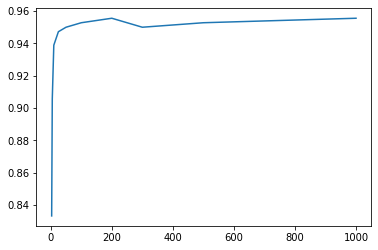

In [64]:
plt.plot(N_estimators, accuracies)
plt.show()

## Case study: Titanic

Znaleźć najlepszy klasyfikator, który będzie przewidywał czy dana osoba przetrwa.

In [68]:
df = pd.DataFrame({'A': ['a', 'b', 'a'], 
                   'B': ['b', 'a', 'c'],
                   'C': [1, 2, 3]})
df

,A,B,C
0,a,b,1
1,b,a,2
2,a,c,3


In [69]:
pd.get_dummies(df)

,C,A_a,A_b,B_a,B_b,B_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


In [66]:
import pandas as pd
data = pd.read_csv("Dane/titanic.csv", decimal=",")
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,3,0,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S,NaN
1,3,0,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.25,NaN,S,"East Providence, RI"
2,3,0,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S,"East Providence, RI"
3,3,1,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S,"East Providence, RI"
4,3,1,"Abelseth, Miss. Karen Marie",female,16.0,0,0,348125,7.65,NaN,S,"Norway Los Angeles, CA"


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1046 non-null   int64  
 1   survived   1046 non-null   int64  
 2   name       1046 non-null   object 
 3   sex        1046 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1046 non-null   int64  
 6   parch      1046 non-null   int64  
 7   ticket     1046 non-null   object 
 8   fare       1045 non-null   float64
 9   cabin      272 non-null    object 
 10  embarked   1044 non-null   object 
 11  home.dest  685 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 98.2+ KB


In [71]:
data.describe(include="all")

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
count,1046.000000,1046.000000,1046,1046,1046.000000,1046.000000,1046.00000,1046,1045.000000,272,1044,685
unique,NaN,NaN,1044,2,NaN,NaN,NaN,732,NaN,174,3,348
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA 2144,NaN,C23 C25 C27,S,"New York, NY"
freq,NaN,NaN,2,658,NaN,NaN,NaN,8,NaN,6,782,55
mean,2.207457,0.408222,NaN,NaN,29.881135,0.502868,0.42065,NaN,36.686080,NaN,NaN,NaN
std,0.841497,0.491740,NaN,NaN,14.413500,0.912167,0.83975,NaN,55.732533,NaN,NaN,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.00000,NaN,0.000000,NaN,NaN,NaN
25%,1.000000,0.000000,NaN,NaN,21.000000,0.000000,0.00000,NaN,8.050000,NaN,NaN,NaN
50%,2.000000,0.000000,NaN,NaN,28.000000,0.000000,0.00000,NaN,15.750000,NaN,NaN,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,1.00000,NaN,35.500000,NaN,NaN,NaN


In [76]:
data["pclass"] = data.pclass.astype("category")

In [78]:
data.ticket

0       C.A. 5547
1       C.A. 2673
2       C.A. 2673
3       C.A. 2673
4          348125
          ...    
1041       248747
1042         2665
1043         2656
1044         2670
1045       315082
Name: ticket, Length: 1046, dtype: object

In [80]:
data.describe()

,survived,age,sibsp,parch,fare
count,1046.000000,1046.000000,1046.000000,1046.00000,1045.000000
mean,0.408222,29.881135,0.502868,0.42065,36.686080
std,0.491740,14.413500,0.912167,0.83975,55.732533
min,0.000000,0.166700,0.000000,0.00000,0.000000
25%,0.000000,21.000000,0.000000,0.00000,8.050000
50%,0.000000,28.000000,0.000000,0.00000,15.750000
75%,1.000000,39.000000,1.000000,1.00000,35.500000
max,1.000000,80.000000,8.000000,6.00000,512.329200


In [84]:
data["fare"] = data.fare.fillna(data.fare.median())

In [86]:
data.fare.isnull().sum()

0

In [87]:
data.cabin.value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F4                 4
C22 C26            4
                  ..
B52 B54 B56        1
C49                1
D11                1
C39                1
E39 E41            1
Name: cabin, Length: 174, dtype: int64

In [94]:
data.cabin.str[0].fillna("Brak").value_counts(0)

Brak    774
C        86
B        63
D        42
E        38
A        19
F        18
G         5
T         1
Name: cabin, dtype: int64

In [95]:
data["deck"] = data.cabin.str[0].fillna("Brak")
# przydałoby sie zgrupowac T i G z brakami
data.drop(["cabin"], axis=1, inplace=True)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest,deck
0,3,0,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,S,NaN,Brak
1,3,0,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.2500,S,"East Providence, RI",Brak
2,3,0,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.2500,S,"East Providence, RI",Brak
3,3,1,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,S,"East Providence, RI",Brak
4,3,1,"Abelseth, Miss. Karen Marie",female,16.0,0,0,348125,7.6500,S,"Norway Los Angeles, CA",Brak
...,...,...,...,...,...,...,...,...,...,...,...,...
1041,2,0,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,S,Paris,Brak
1042,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,C,NaN,Brak
1043,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,C,NaN,Brak
1044,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,C,NaN,Brak


In [97]:
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest,deck
0,3,0,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,S,NaN,Brak
1,3,0,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.2500,S,"East Providence, RI",Brak
2,3,0,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.2500,S,"East Providence, RI",Brak
3,3,1,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,S,"East Providence, RI",Brak
4,3,1,"Abelseth, Miss. Karen Marie",female,16.0,0,0,348125,7.6500,S,"Norway Los Angeles, CA",Brak
...,...,...,...,...,...,...,...,...,...,...,...,...
1041,2,0,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,S,Paris,Brak
1042,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,C,NaN,Brak
1043,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,C,NaN,Brak
1044,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,C,NaN,Brak


In [100]:
data.embarked.value_counts(dropna=False)

S      782
C      212
Q       50
NaN      2
Name: embarked, dtype: int64

In [105]:
data["embarked"] = data.embarked.fillna(data.embarked.mode()[0])

In [108]:
data["home.dest"].value_counts()

New York, NY                          55
London                                14
Montreal, PQ                          10
Cornwall / Akron, OH                   9
Winnipeg, MB                           8
                                      ..
Glen Ridge, NJ                         1
Stockholm, Sweden / Washington, DC     1
Dorking, Surrey, England               1
Foresvik, Norway Portland, ND          1
New York, NY / Washington, DC          1
Name: home.dest, Length: 348, dtype: int64

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1046 non-null   category
 1   survived   1046 non-null   int64   
 2   name       1046 non-null   object  
 3   sex        1046 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1046 non-null   int64   
 6   parch      1046 non-null   int64   
 7   ticket     1046 non-null   object  
 8   fare       1046 non-null   float64 
 9   embarked   1046 non-null   object  
 10  home.dest  685 non-null    object  
 11  deck       1046 non-null   object  
dtypes: category(1), float64(2), int64(3), object(6)
memory usage: 91.2+ KB


In [110]:
data.drop(["name", "ticket", "home.dest"], axis=1, inplace=True)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1046 non-null   category
 1   survived  1046 non-null   int64   
 2   sex       1046 non-null   object  
 3   age       1046 non-null   float64 
 4   sibsp     1046 non-null   int64   
 5   parch     1046 non-null   int64   
 6   fare      1046 non-null   float64 
 7   embarked  1046 non-null   object  
 8   deck      1046 non-null   object  
dtypes: category(1), float64(2), int64(3), object(3)
memory usage: 66.7+ KB


In [112]:
X = data.drop("survived", axis=1)
y = data.survived

In [118]:
# jezeli uzywalibysmy czystej regresji logistycznej to lepszy ten wariant:
# pd.get_dummies(X, drop_first=True)

In [117]:
X = pd.get_dummies(X)

In [129]:
X

,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,...,embarked_S,deck_A,deck_B,deck_Brak,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T
0,42.0,0,0,7.5500,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,13.0,0,2,20.2500,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
2,16.0,1,1,20.2500,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
3,35.0,1,1,20.2500,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,0
4,16.0,0,0,7.6500,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,24.0,0,0,13.0000,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1042,14.5,1,0,14.4542,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1043,26.5,0,0,7.2250,0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
1044,27.0,0,0,7.2250,0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0


In [119]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2)

In [120]:
?RandomForestClassifier

In [123]:
model = RandomForestClassifier()
param_grid = {"n_estimators": [100, 250, 500], 
              "min_samples_leaf": [1, 5, 10],
              "max_samples": [0.75, 1]}

optimizer = GridSearchCV(model, 
                         param_grid, 
                         cv=10, 
                         scoring="accuracy",
                         n_jobs=-1)
optimizer.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_samples': [0.75, 1],
                         'min_samples_leaf': [1, 5, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='accuracy')

In [124]:
optimizer.best_params_

{'max_samples': 0.75, 'min_samples_leaf': 5, 'n_estimators': 250}

In [126]:
accuracy_score(y_test, optimizer.best_estimator_.predict(X_test))

0.7714285714285715

In [128]:
model = Pipeline([("scaler", StandardScaler()), 
                  ("model", SVC(kernel='rbf'))])
param_grid = {"model__C": [0.01, 0.1, 1, 10, 100], 
              "model__gamma": [0.1, 1, 10, 'scale', 'auto']}

optimizer = GridSearchCV(model, 
                         param_grid, 
                         cv=10, 
                         scoring="accuracy",
                         n_jobs=-1)
optimizer.fit(X_train, y_train)

print(optimizer.best_params_)
accuracy_score(y_test, optimizer.best_estimator_.predict(X_test))

{'model__C': 10, 'model__gamma': 'scale'}


0.7904761904761904

In [130]:
def optimize_and_evaluate(model, param_grid, X_train, y_train, X_test, y_test):
    
    optimizer = GridSearchCV(model, 
                         param_grid, 
                         cv=10, 
                         scoring="accuracy",
                         n_jobs=-1)
    optimizer.fit(X_train, y_train)

    best_params = optimizer.best_params_
    test_score = accuracy_score(y_test, 
                                optimizer.best_estimator_.predict(X_test))
    
    return test_score, best_params

In [131]:
model = RandomForestClassifier()
param_grid = {"n_estimators": [100, 250, 500], 
              "min_samples_leaf": [1, 5, 10],
              "max_samples": [0.75, 1]}

optimize_and_evaluate(model, param_grid, 
                      X_train, y_train, 
                      X_test, y_test)

(0.7619047619047619,
 {'max_samples': 0.75, 'min_samples_leaf': 5, 'n_estimators': 250})

In [132]:
model = Pipeline([("scaler", StandardScaler()), 
                  ("model", SVC(kernel='rbf'))])
param_grid = {"model__C": [0.01, 0.1, 1, 10, 100], 
              "model__gamma": [0.1, 1, 10, 'scale', 'auto']}

optimize_and_evaluate(model, param_grid, 
                      X_train, y_train, 
                      X_test, y_test)

(0.7904761904761904, {'model__C': 10, 'model__gamma': 'scale'})

In [135]:
models = [
    RandomForestClassifier(),
    Pipeline([("scaler", StandardScaler()), 
              ("model", SVC(kernel='rbf'))])
]

param_grids =[
    {"n_estimators": [100, 250],
     "min_samples_leaf": [1, 5],
     "max_samples": [0.75, 1]},
    {"model__C": [0.01, 0.1, 1, 10], 
     "model__gamma": [0.1, 1, 10, 'scale', 'auto']}
]

for model, param_grid in zip(models, param_grids):
    print(model)
    print(optimize_and_evaluate(model, param_grid, 
                      X_train, y_train, 
                      X_test, y_test))

RandomForestClassifier()
(0.7761904761904762, {'max_samples': 0.75, 'min_samples_leaf': 5, 'n_estimators': 250})
Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])
(0.7904761904761904, {'model__C': 10, 'model__gamma': 'scale'})
